In [2]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from random import randint
import tensorflow as tf
import keras
from keras import layers
from keras import models
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from datetime import datetime
from itertools import product
from keras.applications import VGG16, ResNet50, MobileNetV2
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import shutil
from PIL import Image

In [3]:
from tensorflow.keras.datasets import cifar10
(x_bigtrain, y_bigtrain), (x_test, y_test) = cifar10.load_data()

y_bigtrain = y_bigtrain.ravel()
y_test = y_test.ravel()

#split the data
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_bigtrain, y_bigtrain, test_size=0.2, stratify=y_bigtrain, random_state=42)

images_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(images_classes)

x_train = np.array(x_train, np.float32)
x_train = x_train / 255.

x_val = np.array(x_val, np.float32)
x_val = x_val / 255.

x_test = np.array(x_test, np.float32)
x_test = x_test / 255.


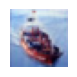

ship




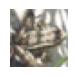

frog




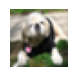

dog




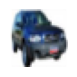

automobile




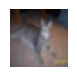

cat




In [4]:
total_number_of_images = x_train.shape[0]
number_of_images = 5 # number of images to display

for i in range(number_of_images):
    nomer_of_image = randint(1, total_number_of_images)
    plt.figure(figsize=(.75, .75))
    plt.imshow(x_train[nomer_of_image])
    plt.axis('off')
    plt.show()

    print(images_classes[y_train[nomer_of_image]])
    print()
    print()

In [5]:
print()
print(f'x_train Shape: {x_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print()
print(f'x_val Shape: {x_val.shape}')
print(f'y_val Shape: {y_val.shape}')
print()
print(f'x_test Shape: {x_test.shape}')
print(f'y_test Shape: {y_test.shape}')


x_train Shape: (40000, 32, 32, 3)
y_train Shape: (40000,)

x_val Shape: (10000, 32, 32, 3)
y_val Shape: (10000,)

x_test Shape: (10000, 32, 32, 3)
y_test Shape: (10000,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.2730 - loss: 3.0097 - val_accuracy: 0.4364 - val_loss: 1.7283
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.4407 - loss: 1.7216 - val_accuracy: 0.5018 - val_loss: 1.5778
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.4975 - loss: 1.5651 - val_accuracy: 0.5222 - val_loss: 1.5186
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.5307 - loss: 1.5111 - val_accuracy: 0.5862 - val_loss: 1.3037
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.5583 - loss: 1.4550 - val_accuracy: 0.5014 - val_loss: 1.6650
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.5698 - loss: 1.4270 - val_accuracy: 0.6007 - val_loss: 1.3243
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.5793 - loss: 1.4073 - val_accuracy: 0.6068 - val_loss: 1.3437


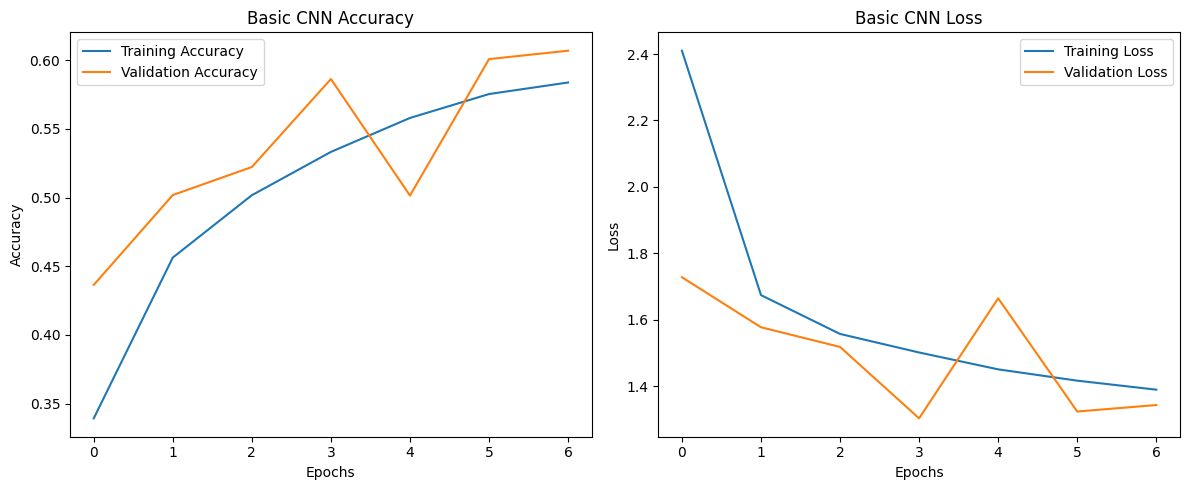

In [6]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from random import randint
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from datetime import datetime
from itertools import product
from keras.applications import VGG16, ResNet50, MobileNetV2
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import shutil
from PIL import Image

# Define a simple CNN model for baseline performance
def build_basic_cnn(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu', kernel_regularizer='l2'))
    model.add(layers.Dropout(0.6))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Train and evaluate the basic CNN model
input_shape = (32, 32, 3)
batch_size = 32

# Data augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rotation_range=15,
    zoom_range=0.1
)
datagen.fit(x_train)

basic_cnn = build_basic_cnn(input_shape, num_classes)
basic_cnn.compile(optimizer=Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
basic_history = basic_cnn.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                              validation_data=(x_val, y_val),
                              epochs=20,
                              callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)],
                              verbose=1)

# Plot training and validation accuracy/loss for basic CNN
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(basic_history.history['accuracy'], label='Training Accuracy')
plt.plot(basic_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Basic CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(basic_history.history['loss'], label='Training Loss')
plt.plot(basic_history.history['val_loss'], label='Validation Loss')
plt.title('Basic CNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.4210 - loss: 1.6118 - val_accuracy: 0.7508 - val_loss: 0.7791 - learning_rate: 1.0000e-04
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 60ms/step - accuracy: 0.7387 - loss: 0.7899 - val_accuracy: 0.7858 - val_loss: 0.6436 - learning_rate: 1.0000e-04
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 62ms/step - accuracy: 0.7844 - loss: 0.6442 - val_accuracy: 0.8126 - val_loss: 0.5822 - learning_rate: 1.0000e-04
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 0.8156 - loss: 0.5561 - val_accuracy: 0.8408 - val_loss: 0.4663 - learning_rate: 1.0000e-04
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.8380 - loss: 0.4830 - val_accuracy: 0.8536 - val_loss: 0.4290 - learning_rate: 1.0000e-04
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.8545 - loss: 0.4380 - val_accuracy: 0.8522 - val_loss: 0.4417 - learning_rate: 1.0000e-04
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/ste

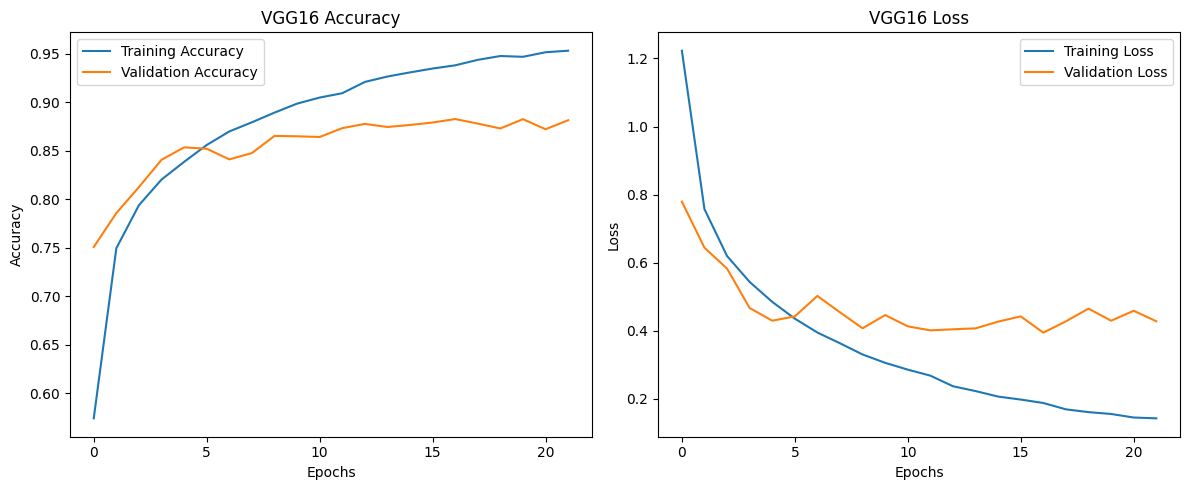

In [7]:

def build_model(base_model, num_classes, input_shape):
    base_model = base_model(input_shape=input_shape, include_top=False, weights='imagenet')
    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.6)(x)
    x = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=x)
    return model

# Set parameters
input_shape = (32, 32, 3)
batch_size = 64
epochs = 50  # Increased epochs for better optimization

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)

# Learning rate rate scheduler
def lr_schedule(epoch, lr):
    if epoch > 10:
        lr = lr * 0.5
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# Train and evaluate VGG16, ResNet50, and MobileNetV2 models
models_histories = {}
models_val_accuracies = {}

# Define models
vgg16_model = build_model(VGG16, num_classes, input_shape)

# Compile models
for model in [vgg16_model]:
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train models and save each history
for model_name, model in zip(['VGG16'], [vgg16_model]):
    history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        validation_data=(x_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size,
                        callbacks=[early_stopping, reduce_lr],
                        verbose=1)
    models_histories[model_name] = history
    models_val_accuracies[model_name] = max(history.history['val_accuracy'])

# Plot training and validation accuracy/loss for all models
for model_name, history in models_histories.items():
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"{model_name} Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"{model_name} Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 118s 71ms/step - accuracy: 0.1230 - loss: 3.9921 - val_accuracy: 0.0946 - val_loss: 58.1225 - learning_rate: 1.0000e-05
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 61ms/step - accuracy: 0.2031 - loss: 2.4386 - val_accuracy: 0.3676 - val_loss: 2.0436 - learning_rate: 1.0000e-05
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.2808 - loss: 2.0793 - val_accuracy: 0.4438 - val_loss: 1.8723 - learning_rate: 1.0000e-05
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.3654 - loss: 1.8249 - val_accuracy: 0.5188 - val_loss: 1.6807 - learning_rate: 1.0000e-05
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 64ms/step - accuracy: 0.4404 - loss: 1.6247 - val_accuracy: 0.5591 - val_loss: 1.3376 - learning_rate: 1.0000e-05
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.4967 - loss: 1.4645 - val_accuracy: 0.5992 - val_loss: 1.2460 - learning_rate: 1.0000e-05
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/s

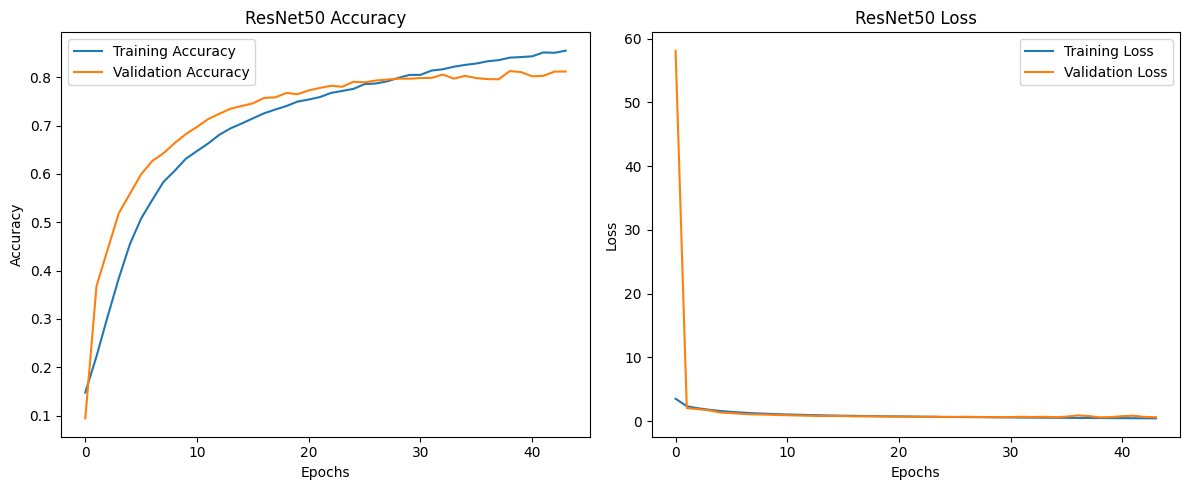

In [11]:
def build_model(base_model, num_classes, input_shape):
    base_model = base_model(input_shape=input_shape, include_top=False, weights='imagenet')
    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.6)(x)
    x = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=x)
    return model

# Set parameters
input_shape = (32, 32, 3)
batch_size = 64
epochs = 50  # Increased epochs for better optimization

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)

# Learning rate rate scheduler
def lr_schedule(epoch, lr):
    if epoch > 10:
        lr = lr * 0.5
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# Train and evaluate VGG16, ResNet50, and MobileNetV2 models
models_histories = {}
models_val_accuracies = {}

# Define models
resnet50_model = build_model(ResNet50, num_classes, input_shape)

# Compile models
for model in [resnet50_model]:
    model.compile(optimizer=Adam(learning_rate=1e-5),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train models and save each history
for model_name, model in zip(['ResNet50'], [resnet50_model]):
    history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        validation_data=(x_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size,
                        callbacks=[early_stopping, reduce_lr],
                        verbose=1)
    models_histories[model_name] = history
    models_val_accuracies[model_name] = max(history.history['val_accuracy'])

# Plot training and validation accuracy/loss for all models
for model_name, history in models_histories.items():
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"{model_name} Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"{model_name} Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [12]:
# Select the best model based on validation accuracy
best_model_name = max(models_val_accuracies, key=models_val_accuracies.get)
print(f"Best model based on validation accuracy: {best_model_name} with LR: 1e-3, optimizer: Adam, accuracy: {models_val_accuracies[best_model_name]:.4f}")

Best model based on validation accuracy: VGG16 with LR: 1e-3, optimizer: Adam, accuracy: 0.8818


Tuning with learning rate: 1e-05, optimizer: Adam
Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 55s 39ms/step - accuracy: 0.3693 - loss: 1.7861 - val_accuracy: 0.6597 - val_loss: 0.9853 - learning_rate: 1.0000e-05
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 38ms/step - accuracy: 0.6662 - loss: 0.9980 - val_accuracy: 0.7309 - val_loss: 0.7843 - learning_rate: 1.0000e-05
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 48s 38ms/step - accuracy: 0.7193 - loss: 0.8227 - val_accuracy: 0.7790 - val_loss: 0.6492 - learning_rate: 1.0000e-05
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.7570 - loss: 0.7265 - val_accuracy: 0.8028 - val_loss: 0.5792 - learning_rate: 1.0000e-05
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 38ms/step - accuracy: 0.7764 - loss: 0.6621 - val_accuracy: 0.7913 - val_loss: 0.6117 - learning_rate: 1.0000e-05
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 48s 38ms/step - accuracy: 0.7926 - loss: 0.6098 - val_accuracy: 0.8191 - val_loss: 0.5251 - learning_rate: 1

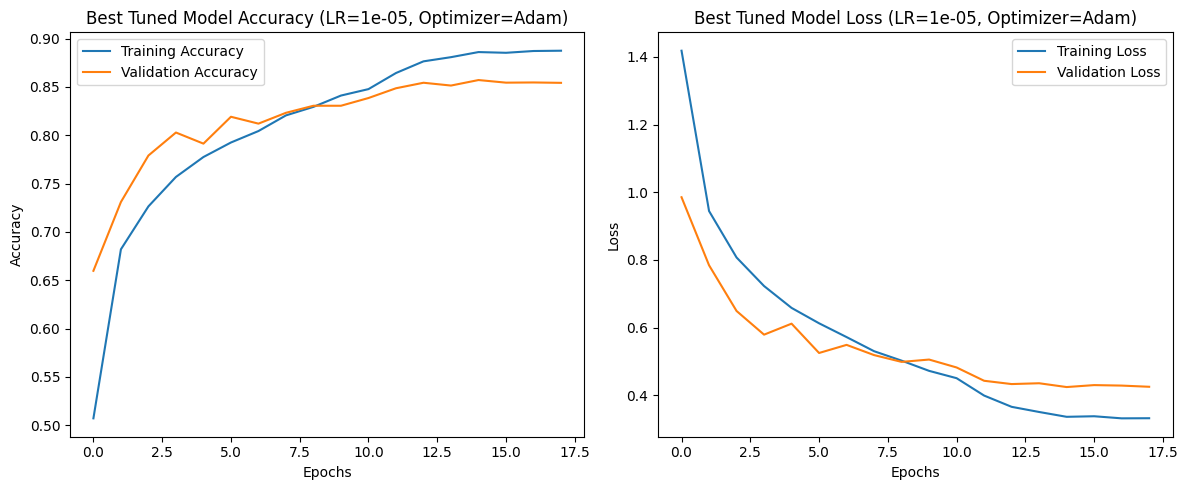

In [9]:
# Hyperparameter tuning on the best model
learning_rates = [1e-5, 1e-4, 5e-4, 1e-3]
optimizers = [Adam, SGD]

best_val_acc = 0
best_tuned_model = None
best_tuned_history = None
best_tuned_params = {}

for lr, opt in product(learning_rates, optimizers):
    print(f"Tuning with learning rate: {lr}, optimizer: {opt.__name__}")
    model = build_model(VGG16, num_classes, input_shape) if best_model_name == 'VGG16' else build_model(ResNet50, num_classes, input_shape) if best_model_name == 'ResNet50' else build_model(MobileNetV2, num_classes, input_shape)
    model.compile(optimizer=opt(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        validation_data=(x_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size,
                        callbacks=[early_stopping, reduce_lr, lr_scheduler],
                        verbose=1)
    val_acc = max(history.history['val_accuracy'])
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_tuned_model = model
        best_tuned_history = history
        best_tuned_params = {'learning_rate': lr, 'optimizer': opt.__name__}

# Plot training and validation accuracy/loss for best tuned model
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(best_tuned_history.history['accuracy'], label='Training Accuracy')
plt.plot(best_tuned_history.history['val_accuracy'], label='Validation Accuracy')
plt.title(f"Best Tuned Model Accuracy (LR={best_tuned_params['learning_rate']}, Optimizer={best_tuned_params['optimizer']})")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(best_tuned_history.history['loss'], label='Training Loss')
plt.plot(best_tuned_history.history['val_loss'], label='Validation Loss')
plt.title(f"Best Tuned Model Loss (LR={best_tuned_params['learning_rate']}, Optimizer={best_tuned_params['optimizer']})")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [2]:
# Evaluate the best tuned model on the test set
test_loss, test_acc = best_tuned_model.evaluate(x_test, y_test, verbose=0)
print(f"Best Tuned Model Test Accuracy: {test_acc}")


NameError: name 'best_tuned_model' is not defined